# Modeling and Simulation in Python
Allen B Downey

Working through this book. Notes from reading and example code. Implementing things without using the class package.

## Intro

**This book's immediate goal:** writing simulations of physical systems

In [78]:
import numpy as np
import scipy as sp
import matplotlib as plt
import pandas as pd
import sympy as sym
import pint as pt

## Modeling

*All models are wrong, but some are useful*
    -George Box

**abstraction:** deciding what details can be left out
**a model** description of a system that includes only the features we think are essential. the goal of the modeling process is to find the model best suited to its purpose (prediction, explanation, or design)

**often a simple model is better.** if we include only the essential features and leave out the rest,we get models that are easier to work with, and the explanations they provide can be cleaer and more compelling. start with a simple model, even if it is too simple, and test whether it is good enough  for its purpose.


In [11]:
from pint import UnitRegistry
unitsR = UnitRegistry()

#penny falling from the empire state building
a = 9.8 * unitsR.meter / unitsR.second**2
print( a )
print( a.units )
print( a.dimensionality )

9.8 meter / second ** 2
meter / second ** 2
[length] / [time] ** 2


In [18]:
h = 381 * unitsR.meter
t = np.sqrt( 2 * h / a )
v = round( a * t, 2 )
print( v )

86.42 meter / second


In [21]:
#convert to miles/hour
mile = unitsR.mile
hour = unitsR.hour
round( v.to(mile/hour), 2 )

193.32 <Unit('mile / hour')>

In [22]:
#if same dimensionality, will convert to units of first variable
foot = unitsR.foot
pole_height = 10 * foot

In [23]:
pole_height + h

1260.0 <Unit('foot')>

In [24]:
h + pole_height

384.048 <Unit('meter')>

In [25]:
#but what about terminal velocity?
#How long will it take a penny to land from the top of the 
#empire state building when we take into account that the penny 
#reaches a terminal velocity of 18 meters/second?
meter = unitsR.meter
second = unitsR.second

# How long until the penny reaches 18 m/s with constant acceleration a.
termV = 18 * meter / second
time2termV = termV / a

# How far would the penny fall during that time?
dist2termV = a * time2termV**2 / 2

# How long to fall the remaining distance 
#with constant velocity 18 m/s?
remainingDist = h - dist2termV
timeRemainingDist = remainingDist / termV

# STotal time for penny to fall 381 m
totalTime = time2termV + timeRemainingDist
totalTime

22.085034013605444 <Unit('second')>

## Bike Share 

a simple model of a bike share system.

In [4]:
#define a state object to collect state variables to simulate the bikes at each location
class State(object):
    olin = 0
    wellesley = 0   

In [5]:
#an instance 
bikeshare = State( )

In [12]:
bikeshare.wellesley = 2
bikeshare.olin = 10
vars( bikeshare )

{'wellesley': 2, 'olin': 10}

In [14]:
#a student moves a bike from olin to wellesley
bikeshare.olin -= 1
bikeshare.wellesley += 1
vars( bikeshare )

{'wellesley': 4, 'olin': 8}

In [19]:
#def a fxn to move a bike from olin to welesley & vice versa
def bike_to_wellesley():
    print( 'a bike goes to Wellesley' )
    bikeshare.olin -= 1
    bikeshare.wellesley += 1
    
def bike_to_olin():
    print( 'a bike goes to Olin' )
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [17]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_wellesley()
print( bikeshare.olin, bikeshare.wellesley )

8 4
a bike goes to Wellesley
7 5


In [18]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_olin()
print( bikeshare.olin, bikeshare.wellesley )

7 5
a bike goes to Olin
8 4


In [20]:
#return a T/F bool result with a given probability
import random

def flip( probability ):
    return random.random() < probability

In [42]:
if flip( 0.5 ): #fair coin flip
    print( 'heads' )
else:
    print( 'tails' )
        

tails


In [45]:
#simulate a time step of one minute
#the chance that a student arrives during a one minute periodis 50% at Wellesley
# " ... " 33% at Olin
def step():
    if flip( 0.5 ):
        bike_to_wellesley()
    if flip( 0.33 ):
        bike_to_olin()

In [46]:
step()
vars( bikeshare )

a bike goes to Wellesley


{'wellesley': 5, 'olin': 7}

**Generalization** adding parameters to a function is called generalization because it makes the function more general, that is, less specialized.

In [48]:
#the probabilities might change. let's rewrite the step fxn to take the propabilities as parameters
def step( p1, p2 ):
    if flip( p1 ):
        bike_to_wellesley()
    if flip( p2 ):
        bike_to_olin()    

In [50]:
step( 0.7, 0.2 )

a bike goes to Wellesley


In [51]:
for i in range( 4 ):
    bike_to_wellesley()

a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley


In [52]:
vars( bikeshare )

{'wellesley': 10, 'olin': 2}

In [63]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [71]:
bikeshare.wellesley = 20
bikeshare.olin = 20
num_step = 30

rOlin = pd.Series(np.zeros(num_step))
rWellesley = pd.Series(np.zeros(num_step))

for i in range( num_step ):
    step( 0.3, 0.2 )
    rOlin[i] = bikeshare.olin
    rWellesley[i] = bikeshare.wellesley

a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin


In [74]:
print( 'Olin mean = ', str( rOlin.mean() ) )
print( 'Wellesley mean = ', str( rWellesley.mean() ) )

Olin mean =  18.2
Wellesley mean =  21.8


In [76]:
data = {'Olin':rOlin, 'Wellesley':rWellesley, 'x':range(num_step)}
df = pd.DataFrame( data )

Text(0, 0.5, 'Number of Bikes')

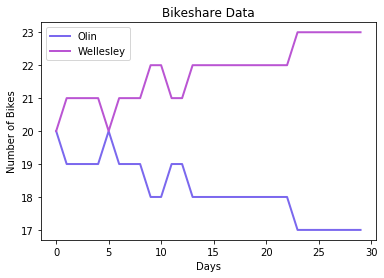

In [83]:
# multiple line plot
import matplotlib.pyplot as plt

plt.plot( 'x', 'Olin', data=df, marker='', color='mediumslateblue', linewidth=2, label="Olin")
plt.plot( 'x', 'Wellesley', data=df, marker='', color='mediumorchid', linewidth=2, label="Wellesley")
plt.legend()
plt.title('Bikeshare Data')
plt.xlabel('Days')
plt.ylabel('Number of Bikes')
